In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [32]:
from sklearn import linear_model

In [67]:
df_06 = pd.read_csv('datasets/htx_2006_weather.csv', na_values='Blank') 


df_10 = pd.read_csv('datasets/htx_2010_weather.csv', na_values='Blank')
df_11 = pd.read_csv('datasets/htx_2011_weather.csv', na_values='Blank') 
df_12 = pd.read_csv('datasets/htx_2012_weather.csv', na_values='Blank') 
df_13 = pd.read_csv('datasets/htx_2013_weather.csv', na_values='Blank') 
df_14 = pd.read_csv('datasets/htx_2014_weather.csv', na_values='Blank') 
df_15 = pd.read_csv('datasets/htx_2015_weather.csv', na_values='Blank') 
df_18 = pd.read_csv('datasets/htx_2018_weather.csv', na_values='Blank') 
df_19 = pd.read_csv('datasets/htx_2019_weather.csv', na_values='Blank') 
df_21 = pd.read_csv('datasets/htx_2021_weather.csv', na_values='Blank')

df = pd.concat([df_06, df_10, df_11, df_12, df_13, df_14, df_15, df_18, df_19, df_21])

In [58]:
df

,date,min_temp,max_temp,rainfall,wind_speed9am,wind_speed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,rain_today,rain_tomorrow
0,2006-01-01,64.0,81.0,0.0,8.0,14.0,90.0,54.0,29.77,29.65,Cloudy,Partly Cloudy,71.0,81.0,No,No
1,2006-01-02,57.0,79.0,0.0,9.0,10.0,87.0,22.0,29.91,29.89,Partly Cloudy,Fair,63.0,78.0,No,No
2,2006-01-03,49.0,79.0,0.0,0.0,10.0,60.0,24.0,30.07,29.98,Fair,Fair,60.0,79.0,No,No
3,2006-01-04,52.0,76.0,0.0,7.0,7.0,87.0,60.0,30.06,29.97,Mostly Cloudy,Mostly Cloudy,65.0,75.0,No,No
4,2006-01-05,51.0,69.0,0.0,16.0,23.0,42.0,21.0,30.20,30.13,Fair,Fair / Windy,57.0,68.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2021-12-27,68.0,81.0,0.0,5.0,16.0,87.0,58.0,29.89,29.79,Mostly Cloudy,Cloudy,71.0,80.0,No,No
361,2021-12-28,72.0,84.0,0.0,14.0,15.0,74.0,53.0,29.71,29.63,Fair,Mostly Cloudy,76.0,84.0,No,No
362,2021-12-29,72.0,84.0,0.0,9.0,12.0,85.0,56.0,29.72,29.67,Mostly Cloudy,Mostly Cloudy,76.0,84.0,No,No
363,2021-12-30,67.0,83.0,0.0,8.0,9.0,84.0,58.0,29.86,29.79,Haze,Partly Cloudy,73.0,83.0,No,No


In [75]:
rainfall = df['rainfall'].to_numpy()


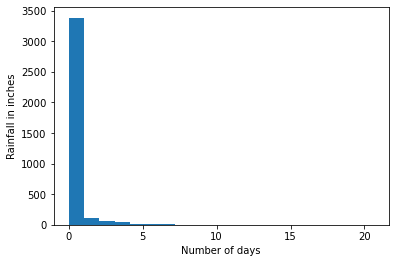

In [81]:
plt.hist(rainfall, bins=20)

plt.xlabel("Number of days")
plt.ylabel("Rainfall (in)")

plt.show()

In [76]:
non_zero_rainfall = rainfall[rainfall != 0]

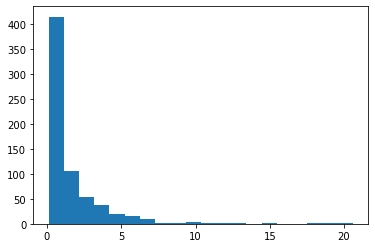

In [73]:
plt.hist(non_zero_rainfall, bins=20)
plt.show() 

In [70]:
train, validate, test = \
              np.split(df.sample(frac=1, random_state=42), 
                       [int(.6*len(df)), int(.8*len(df))])